In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load Dataset kolesterol.csv

In [2]:
# ambil dataset dari folder datasets dengan nama file kolesterol.csv
kol = pd.read_csv('../datasets/kolesterol.csv')

In [3]:
# lihat isi lima data teratas
kol.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


In [4]:
# lihat isi lima data terbawah
kol.tail()

,Weight,Cholesterol,Gender
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1
546,148,176,1


In [5]:
# melihat dimensi dataset
# terdiri dari 547 baris (1 baris untuk kolom, dan 546 baris untuk data)
# dan 3 kolom
kol.shape

(547, 3)

In [6]:
# memfilter hanya kolom Weight dan Cholesterol saja yang diambil
kol_filter = kol[['Weight','Cholesterol']]

In [7]:
kol_filter.head()

,Weight,Cholesterol
0,102,111
1,115,135
2,115,136
3,140,167
4,130,158


In [8]:
# info tipe data dalam dataset kolesterol.csv
kol_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
Weight         547 non-null int64
Cholesterol    547 non-null int64
dtypes: int64(2)
memory usage: 8.6 KB


In [9]:
# statistik descriptive dari masing-masing kolom dalam dataset
kol_filter.describe()

,Weight,Cholesterol
count,547.000000,547.000000
mean,143.572212,170.433272
std,30.837275,39.147189
min,95.000000,102.000000
25%,116.000000,136.000000
50%,140.000000,169.000000
75%,171.000000,208.000000
max,203.000000,235.000000


In [10]:
# melihat hubungan korelasi antar atribut
# semakin mendekati angka satu, maka hubungan antar atribut sangat kuat
kol_filter.corr()

,Weight,Cholesterol
Weight,1.000000,0.988593
Cholesterol,0.988593,1.000000


### Cek Jumlah Missing Value

In [11]:
kol_filter.isnull().sum()

Weight         0
Cholesterol    0
dtype: int64

### Exploratory Data Analysis (EDA)

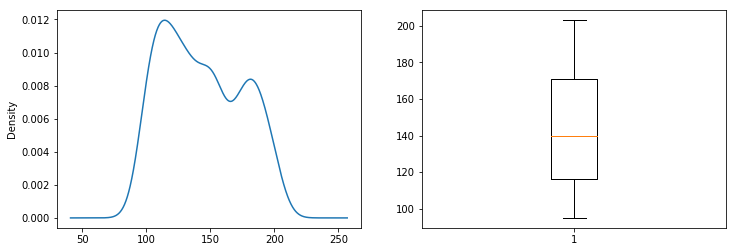

In [12]:
fig = plt.figure(figsize=(12,4))

fig.add_subplot(1,2,1)
kol_filter['Weight'].plot(kind='kde')

fig.add_subplot(1,2,2)
plt.boxplot(kol_filter['Weight'])
plt.show()

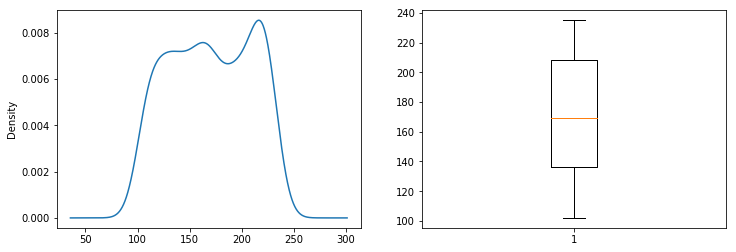

In [13]:
fig = plt.figure(figsize=(12,4))

fig.add_subplot(1,2,1)
kol_filter['Cholesterol'].plot(kind='kde')

fig.add_subplot(1,2,2)
plt.boxplot(kol_filter['Cholesterol'])
plt.show()

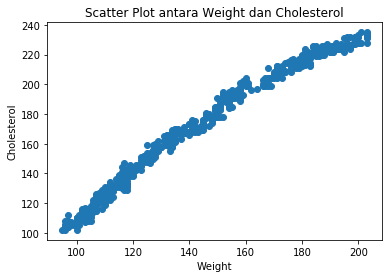

In [14]:
# Bivariate analysis antara weight dan cholesterol
# Menggunakan scatter plot
plt.scatter(kol_filter['Weight'], kol_filter['Cholesterol'])
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('Scatter Plot antara Weight dan Cholesterol')
plt.show()

<ul>
    <li>Scatter plot menunjukkan korelasi positif yang signifikan</li>
    <li>Dalam kata lain, bertambahnya nilai Weight akan mempengeruhi nilai Cholesterol juga bertambah</li>
</ul>

### Modeling dengan Linear Regression

In [15]:
# pisahkan antara atribut biasa dengan kelas
# atribut biasa adalah Weight
# kelas adalah Cholesterol
x = kol_filter['Weight'].values.reshape(-1,1)
y = kol_filter['Cholesterol'].values.reshape(-1,1)

In [16]:
# split data menjadi data training dan data testing, dengan prosentase 70:30

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

In [17]:
# buat variabel linreg untuk memanggil fungsi Linear Regression
linreg = LinearRegression()

In [18]:
# training data
linreg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [19]:
print(linreg.coef_)
print(linreg.intercept_)

[[1.25393095]]
[-9.56245892]


<ul>
    <li>Dari data training di atas, terbentuk formula penghitungan Cholesterol</li>
    <li>Cholesterol = 1.244*Weight - 8.026</li>
</ul>

In [20]:
# hitung score akurasi
linreg.score(xtest, ytest)

0.9755880139468672

Text(0.5, 1.0, 'Representasi Pengetahuan Yang Terbentuk')

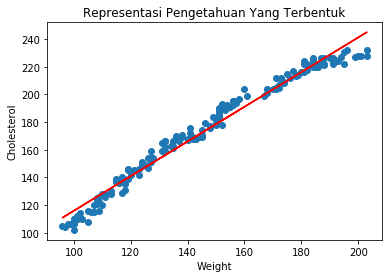

In [21]:
# visualisasi grafik perbandingan hasil aktual vs. prediksi
ypred = linreg.predict(xtest)
plt.scatter(xtest, ytest)
plt.plot(xtest, ypred, c='r')
plt.xlabel('Weight')
plt.ylabel('Cholesterol')
plt.title('Representasi Pengetahuan Yang Terbentuk')

### Prediksi nilai kolesterol dari dataset kolesterol.csv dengan algortime Linear Regression
#### Contoh kasus, berapa nilai kolesterol jika berat badannya adalah 75 kg dan 100 kg

In [22]:
linreg.predict([[75]])

array([[84.4823622]])

In [23]:
linreg.predict([[100]])

array([[115.8306359]])